In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
#"We have commented out this section as the dataset has already been downloaded."
'''
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal")
'''

'\nimport opendatasets as od\n\nod.download(\n    "https://www.kaggle.com/datasets/adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal")\n'

In [ ]:
from pathlib import Path

current_directory = Path.cwd()
print("Current Working Directory:", current_directory)

project_root = Path("/Users/DK19/Downloads/anusha")
data_root = project_root / "archive" / "Dataset_for_AQI_Classification" / "Dataset_for_AQI_Classification"
image_root = project_root / "archive" / "Air Pollution Image Dataset" / "Air Pollution Image Dataset" / "Combined_Dataset" / "All_img"

print("Data root:", data_root)
print("Image root:", image_root)


Current Working Directory: /content
Data root: /Users/DK19/Downloads/anusha/archive/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification
Image root: /Users/DK19/Downloads/anusha/archive/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img


In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/Dataset_for_AQI_Classification/train_data.csv')
df_train

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Tamil Nadu,TN_UnFSG_2023-03-02-08.30-1.jpg,2023,3,2,8:30,119,69.00,106.00,8.00,358.00,22.00,26.00,c_Unhealthy_for_Sensitive_Groups
1,Bengaluru,BENGR_Mod_2023-02-24-08.30-1-166.jpg,2023,2,24,8:30,68,32.00,61.00,26.00,228.00,5.00,21.00,b_Moderate
2,"Biratnagar, Nepal",BIR_UNFSG_VF_2023-02-03-15.00-2-24.jpg,2023,2,3,15:00,141,47.96,68.92,65.57,0.41,2.80,2.51,c_Unhealthy_for_Sensitive_Groups
3,Mumbai,MH_UnFSG_2023-03-10-16.00-1-76.jpg,2023,3,10,16:00,141,72.00,108.00,NaN,NaN,NaN,63.00,c_Unhealthy_for_Sensitive_Groups
4,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-2-8.jpg,2023,2,7,14:00,449,337.00,198.00,23.00,24.00,13.00,57.00,f_Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,"Biratnagar, Nepal",BRI_Un_2023-02-09-08.00-1.jpg,2023,2,9,8:00,171,112.46,163.45,31.17,0.96,3.84,18.78,d_Unhealthy
7829,"ITO, Delhi",DEL_SEV_2023-02-17-13.00-2-25.jpg,2023,2,17,13:00,372,348.00,199.00,25.00,67.00,10.00,107.00,f_Severe
7830,"New Ind Town, Faridabad",HAR_VUN_2022-10-02-10.00-1-1489.jpg,2022,10,2,10:00,230,185.00,199.00,10.00,52.00,12.00,26.00,e_Very_Unhealthy
7831,Mumbai,MH_UnFSG_2023-03-14-13.00-1-385.jpg,2023,3,14,13:00,138,90.00,120.00,143.00,21.00,9.00,16.00,c_Unhealthy_for_Sensitive_Groups


/tmp/ipython-input-2240650576.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train,x='Modified_AQI_Class', order=custom_order, palette='Set2')


<Axes: title={'center': 'Class Distribution of Training Dataset'}, xlabel='Modified_AQI_Class', ylabel='count'>

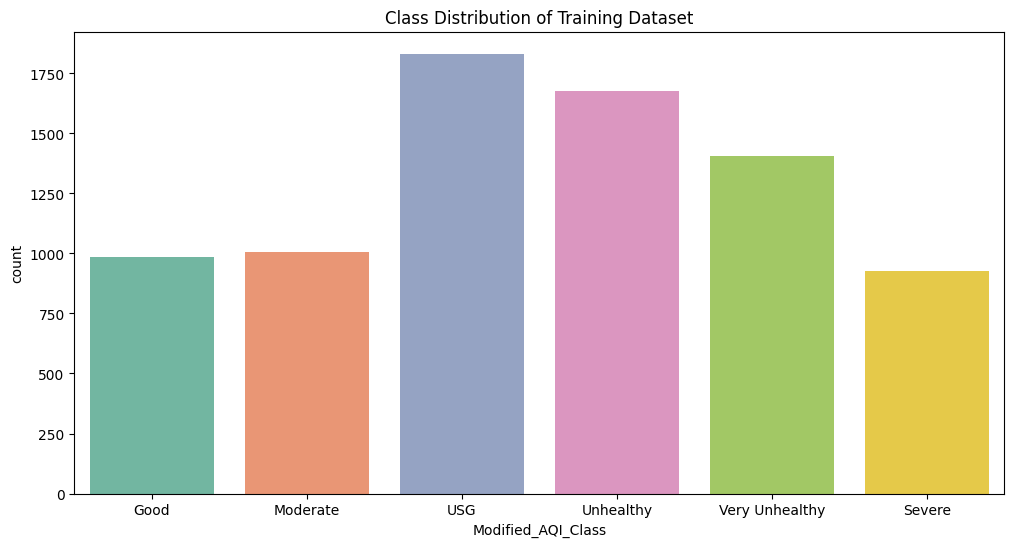

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming AQI_Class column contains categories like 'a_Good', 'b_Moderate', etc.
# You can create a new column with the modified category labels

# Define a mapping dictionary to map the old labels to the new labels
category_mapping = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG',
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}

# Apply the mapping to create a new column with modified category labels
df_train['Modified_AQI_Class'] = df_train['AQI_Class'].map(category_mapping)

# Now, you can plot the count of modified categories
plt.figure(figsize=(12,6))
plt.title('Class Distribution of Training Dataset')
custom_order = ['Good', 'Moderate', 'USG', 'Unhealthy', 'Very Unhealthy', 'Severe']
sns.countplot(data=df_train,x='Modified_AQI_Class', order=custom_order, palette='Set2')

In [ ]:
import numpy as np
min_pm2_lable = np.min(df_train['PM2.5'])
max_pm2_lable = np.max(df_train['PM2.5'])
mean_pm2_lable = np.mean(df_train['PM2.5'])
stdev_pm2_lable = np.std(df_train['PM2.5'])
severe = np.count_nonzero(df_train['PM2.5'] > 250.5)
good = np.count_nonzero(df_train['PM2.5'] < 12.1)
moderate = np.count_nonzero((df_train['PM2.5'] > 12) & (df_train['PM2.5'] < 35.5))
sensitive = np.count_nonzero((df_train['PM2.5'] > 35.4) & (df_train['PM2.5'] < 55.5))
unhealthy = np.count_nonzero((df_train['PM2.5'] > 55.4) & (df_train['PM2.5'] < 150.5))
vunhealthy = np.count_nonzero((df_train['PM2.5'] > 150.4) & (df_train['PM2.5'] < 250.5))
print('Minimum label value for PM2.5 :', min_pm2_lable)
print('Maximum label value for PM2.5 :', max_pm2_lable)
print('Average label value for PM2.5 :', mean_pm2_lable)
print('Standard Deviation label value for PM2.5 :', stdev_pm2_lable)
print('Severe class based on PM2.5 value :', severe)
print('Very Unhealthy class based on PM2.5 value :', vunhealthy)
print('Unhealthy class based on PM2.5 value :', unhealthy)
print('Sensitive class based on PM2.5 value :', sensitive)
print('Moderate class based on PM2.5 value :', moderate)
print('Good class based on PM2.5 value :', good)

Minimum label value for PM2.5 : 4.0
Maximum label value for PM2.5 : 500.0
Average label value for PM2.5 : 142.61533256734327
Standard Deviation label value for PM2.5 : 130.0911373860473
Severe class based on PM2.5 value : 2120
Very Unhealthy class based on PM2.5 value : 855
Unhealthy class based on PM2.5 value : 1851
Sensitive class based on PM2.5 value : 959
Moderate class based on PM2.5 value : 1993
Good class based on PM2.5 value : 55


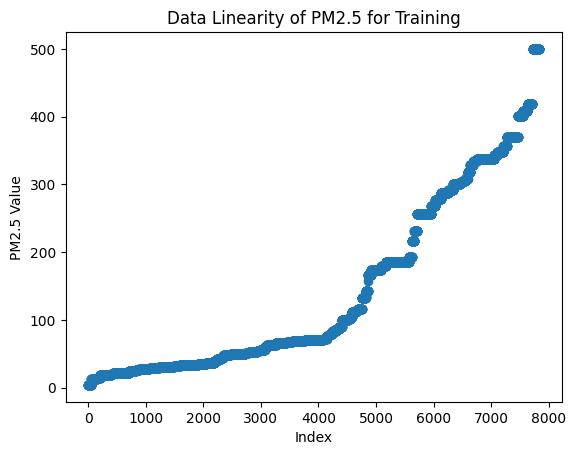

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 4.792e+04
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:54:13   Log-Likelihood:                -41560.
No. Observations:                7833   AIC:                         8.312e+04
Df Residuals:                    7831   BIC:                         8.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.2586      1.102    -60.135      0.0

In [ ]:
import statsmodels.api as sm
df_pm25 = df_train['PM2.5'].sort_values()
df_pm25 = df_pm25.reset_index(drop=True)
x = df_pm25.index
y = df_pm25
plt.xlabel('Index')
plt.ylabel('PM2.5 Value')
plt.title('Data Linearity of PM2.5 for Training')
plt.scatter(x, y)
plt.show()
# Fit the linear regression model
cX = sm.add_constant(x)
model = sm.OLS(y, cX).fit()
print(model.summary())

In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/Dataset_for_AQI_Classification/val_data.csv')
df_val

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Bengaluru,BENGR_Mod_2023-02-23-08.30-1-401.jpg,2023,2,23,8:30,97,43.00,78.00,26.00,258.00,10.00,17.00,b_Moderate
1,"ITO, Delhi",DEL_SEV_2023-02-22-14.00-2-221.jpg,2023,2,22,14:00,450,500.00,480.00,91.00,78.00,17.00,47.00,f_Severe
2,"New Ind Town, Faridabad",HAR_VUN_2022-10-02-10.00-1-2361.jpg,2022,10,2,10:00,230,185.00,199.00,10.00,52.00,12.00,26.00,e_Very_Unhealthy
3,"ITO, Delhi",DEL_VUnH_2023-02-16-14.00-2-7.jpg,2023,2,16,14:00,268,401.00,325.00,73.00,88.00,16.00,NaN,e_Very_Unhealthy
4,Mumbai,MH_Good_2023-03-23-17.00-2.jpg,2023,3,23,17:00,47,14.00,41.00,35.00,6.00,5.00,7.00,a_Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-1-103.jpg,2023,2,7,14:00,449,337.00,198.00,23.00,24.00,13.00,57.00,f_Severe
1955,"ITO, Delhi",DEL_SEV_2023-02-20-14.00-2-156.jpg,2023,2,20,14:00,363,257.00,139.00,41.00,65.00,35.00,83.00,f_Severe
1956,"ITO, Delhi",DEL_SEV_2023-02-22-14.00-2-96.jpg,2023,2,22,14:00,450,500.00,480.00,91.00,78.00,17.00,47.00,f_Severe
1957,"Biratnagar, Nepal",BIR_UNH_VF_2023-02-02- 1700-3-72.jpg,2023,2,2,17:00,156,67.06,95.93,52.38,0.52,3.35,6.49,d_Unhealthy


/tmp/ipython-input-4130265904.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_val,x='Modified_AQI_Class', order=custom_order, palette='Set2')


<Axes: title={'center': 'Class Distribution of Validation Dataset'}, xlabel='Modified_AQI_Class', ylabel='count'>

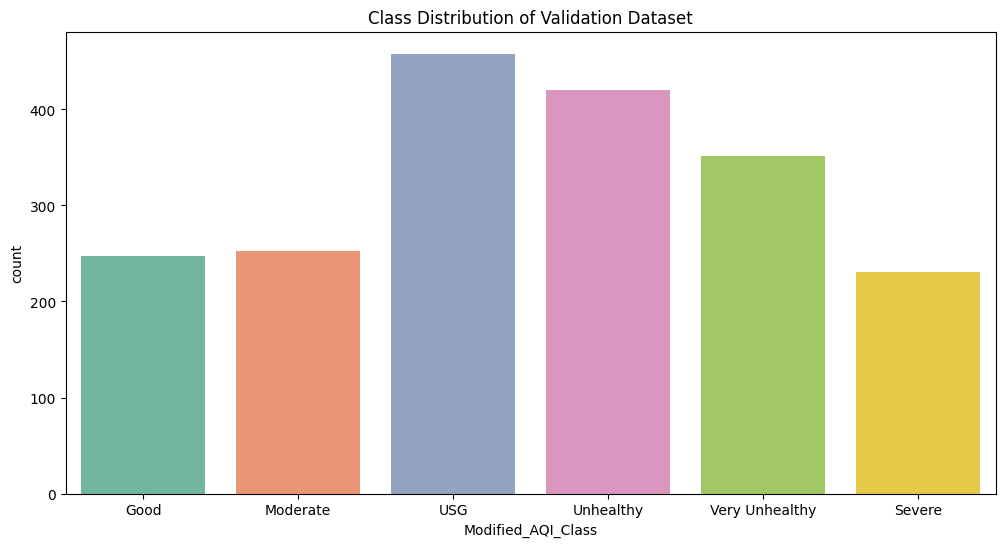

In [ ]:
category_mapping = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG',
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}

# Apply the mapping to create a new column with modified category labels
df_val['Modified_AQI_Class'] = df_val['AQI_Class'].map(category_mapping)

# Now, you can plot the count of modified categories
plt.figure(figsize=(12,6))
plt.title('Class Distribution of Validation Dataset')
custom_order = ['Good', 'Moderate', 'USG', 'Unhealthy', 'Very Unhealthy', 'Severe']
sns.countplot(data=df_val,x='Modified_AQI_Class', order=custom_order, palette='Set2')

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Dataset_for_AQI_Classification/testing_data.csv')
df_test
min_pm2_lable = np.min(df_test['PM2.5'])
max_pm2_lable = np.max(df_test['PM2.5'])
mean_pm2_lable = np.mean(df_test['PM2.5'])
stdev_pm2_lable = np.std(df_test['PM2.5'])
severe = np.count_nonzero(df_test['PM2.5'] > 250.5)
good = np.count_nonzero(df_test['PM2.5'] < 12.1)
moderate = np.count_nonzero((df_test['PM2.5'] > 12) & (df_test['PM2.5'] < 35.5))
sensitive = np.count_nonzero((df_test['PM2.5'] > 35.4) & (df_test['PM2.5'] < 55.5))
unhealthy = np.count_nonzero((df_test['PM2.5'] > 55.4) & (df_test['PM2.5'] < 150.5))
vunhealthy = np.count_nonzero((df_test['PM2.5'] > 150.4) & (df_test['PM2.5'] < 250.5))
print('Minimum label value for PM2.5 :', min_pm2_lable)
print('Maximum label value for PM2.5 :', max_pm2_lable)
print('Average label value for PM2.5 :', mean_pm2_lable)
print('Standard Deviation label value for PM2.5 :', stdev_pm2_lable)
print('Severe class based on PM2.5 value :', severe)
print('Very Unhealthy class based on PM2.5 value :', vunhealthy)
print('Unhealthy class based on PM2.5 value :', unhealthy)
print('Sensitive class based on PM2.5 value :', sensitive)
print('Moderate class based on PM2.5 value :', moderate)
print('Good class based on PM2.5 value :', good)

Minimum label value for PM2.5 : 4.0
Maximum label value for PM2.5 : 500.0
Average label value for PM2.5 : 143.99029411764707
Standard Deviation label value for PM2.5 : 131.34486506303332
Severe class based on PM2.5 value : 673
Very Unhealthy class based on PM2.5 value : 263
Unhealthy class based on PM2.5 value : 598
Sensitive class based on PM2.5 value : 278
Moderate class based on PM2.5 value : 615
Good class based on PM2.5 value : 21


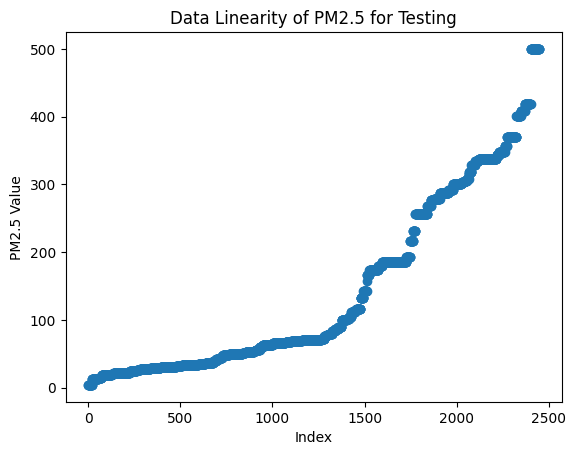

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 1.509e+04
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:54:13   Log-Likelihood:                -13004.
No. Observations:                2448   AIC:                         2.601e+04
Df Residuals:                    2446   BIC:                         2.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.9560      1.983    -33.761      0.0

In [ ]:
df_pm25_test = df_test['PM2.5'].sort_values()
df_pm25_test = df_pm25_test.reset_index(drop=True)
x = df_pm25_test.index
y = df_pm25_test
plt.xlabel('Index')
plt.ylabel('PM2.5 Value')
plt.title('Data Linearity of PM2.5 for Testing')
plt.scatter(x, y)
plt.show()
# Fit the linear regression model
cX = sm.add_constant(x)
model = sm.OLS(y, cX).fit()
print(model.summary())

In [ ]:
#Import all necessary library
import sys
import numpy as np

from typing import Dict, Optional, Tuple
from pathlib import Path

import math
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend #Keras version 2.1.6
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate, LeakyReLU, Input, Conv2D, MaxPooling2D, BatchNormalization, Add

from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
#from PIL import Image

from sklearn.metrics import r2_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


def build_x(path, y, df, target_size=(224, 224), normalize=True):
    base_path = Path(path)
    images = []
    for filename in df['Filename']:
        img_path = base_path / filename
        img = image.load_img(img_path, target_size=target_size)
        img = image.img_to_array(img)
        if normalize:
            img = img / 255.0
        images.append(img)
    return np.array(images)


%matplotlib inline


In [ ]:
# Preparing image data for Validation
y_val = df_val[['AQI','PM2.5','PM10','O3','CO','SO2','NO2']].copy()
val_img = build_x('/content/drive/MyDrive/archive (2)/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img/',y_val, df_val)
val_img.shape

In [ ]:
# Preparing image data for Testing
y_test = df_test[['AQI','PM2.5','PM10','O3','CO','SO2','NO2']].copy()
test_img = build_x('/content/drive/MyDrive/archive (2)/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img/',y_test, df_test)
test_img.shape

In [ ]:
#Preparing label data for Validation
y_val = df_val[['AQI','PM2.5','PM10','O3','CO','SO2','NO2']].copy()
y_val

In [ ]:
#Preparing label data for Testing
y_test = df_test[['AQI','PM2.5','PM10','O3','CO','SO2','NO2']].copy()
y_test

In [ ]:
#This function takes the path to an RGB image file as input, reads the image using Keras library and converts it to a NumPy array.
#You can then use this array as input to your machine learning model.

def build_x(path, y, df):
    train_img = []
    for i in range(len(y)):
        img = image.load_img(path + df['Filename'][i])
        img = image.img_to_array(img)
        img = img / 255
        train_img.append(img)

    x = np.array(train_img)
    return x

In [ ]:
#Preparing label data for Training
y_train = df_train[['AQI','PM2.5','PM10','O3','CO','SO2','NO2']].copy()
train_img = build_x('/content/drive/MyDrive/archive (2)/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img/',y_train, df_train)
train_img.shape

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

def build_x(path, y, df):
    train_img = []
    for i in range(len(y)):
        # Safely join folder + filename
        img_path = os.path.join(path, df['Filename'].iloc[i])

        # Load image
        img = image.load_img(img_path, target_size=(224, 224))  # resize optional
        img = image.img_to_array(img)
        img = img / 255.0  # normalize

        train_img.append(img)

    x = np.array(train_img)
    return x

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os


In [ ]:
base_path = '/content/drive/MyDrive/archive (2)/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset'

data = []
for label, folder in enumerate(['Clean_Air', 'Polluted_Air']):  # 0 = clean, 1 = polluted
    folder_path = os.path.join(base_path, folder)
    for filename in os.listdir(folder_path):
        data.append((filename, label))

df = pd.DataFrame(data, columns=['Filename', 'Label'])
print(df.head())
